# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

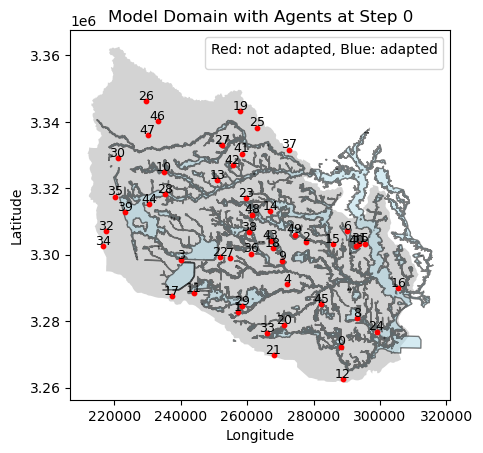

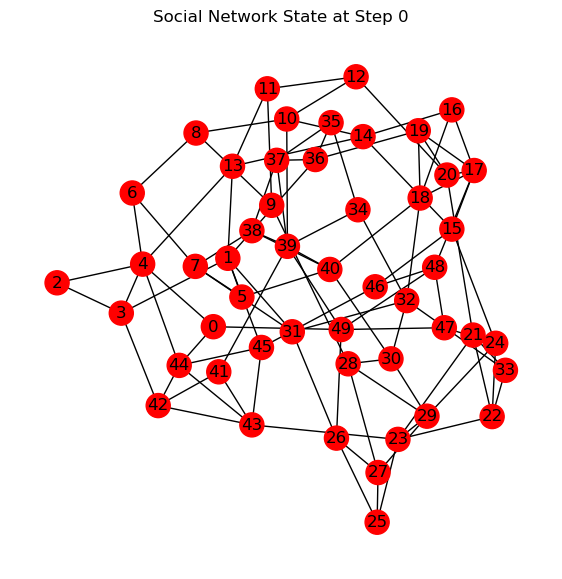

<Figure size 1000x600 with 0 Axes>

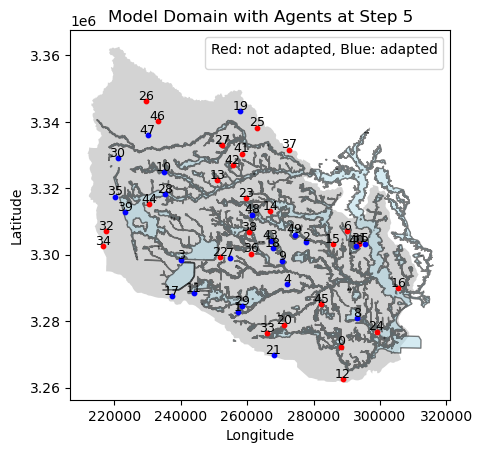

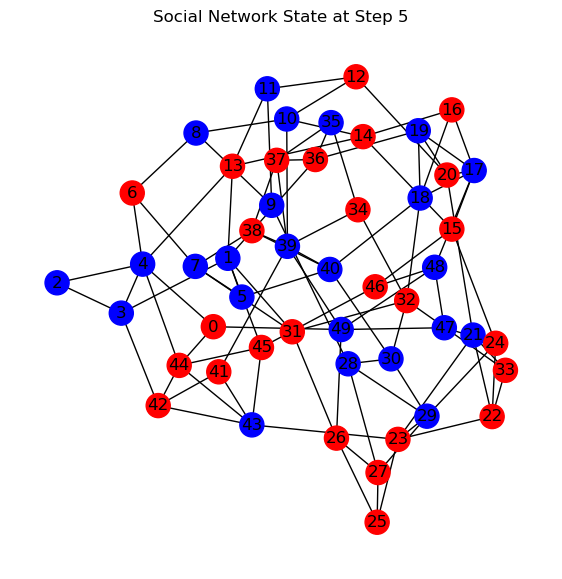

In [8]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(6):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 40 == 5:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()
        


In [9]:
# agent_data = model.datacollector.get_agent_vars_dataframe()
# agent_data

agent_data = model.datacollector.get_agent_vars_dataframe()

# Replace 'agent_unique_id' with the unique identifier of the specific agent you want to retrieve data for
specific_agent_data = agent_data.xs(1, level='AgentID')

specific_agent_data



,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IncomeClass,IsAdapted,FriendsCount,location
Step,,,,,,,,
0,1.345659,0.700136,0.00000,0.000000,lower,False,6,POINT (257239.05990301294 3282683.923553192)
1,1.345659,0.700136,0.00000,0.000000,lower,False,6,POINT (257239.05990301294 3282683.923553192)
2,1.345659,0.700136,0.00000,0.000000,lower,False,6,POINT (257239.05990301294 3282683.923553192)
3,1.345659,0.700136,0.00000,0.000000,lower,False,6,POINT (257239.05990301294 3282683.923553192)
4,1.211093,0.630122,0.00000,0.000000,lower,True,6,POINT (257239.05990301294 3282683.923553192)
5,1.211093,0.630122,1.18486,0.677916,lower,True,6,POINT (257239.05990301294 3282683.923553192)


In [10]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,8
2,13
3,15
4,19
5,24


In [4]:
import pandas as pd 
from agents import Households


# Assuming you have a list of agents in your model
agents = model.schedule.agents

# Record initial flood damage
initial_flood_damage = {agent.unique_id: agent.flood_damage_estimated for agent in agents if isinstance(agent, Households)}

# Run the model steps where agents buy protection
# (Your model execution logic here)

# Record post-protection flood damage
post_protection_flood_damage = {agent.unique_id: agent.flood_damage_estimated for agent in agents if isinstance(agent, Households)}

# Create a DataFrame
flood_damage_df = pd.DataFrame({
    'Agent ID': initial_flood_damage.keys(),
    'Initial Flood Damage': initial_flood_damage.values(),
    'Flood Damage After Protection': post_protection_flood_damage.values()
})

# Output the DataFrame
flood_damage_df


,Agent ID,Initial Flood Damage,Flood Damage After Protection
0,0,0.000000,0.000000
1,1,0.587068,0.587068
2,2,0.369498,0.369498
3,3,0.495151,0.495151
4,4,0.268650,0.268650
5,5,0.530220,0.530220
6,6,0.384652,0.384652
7,7,0.665620,0.665620
8,8,0.000000,0.000000
9,9,0.255334,0.255334


In [5]:
from agents import Households
import pandas as pd

# Retrieve information about agents, adaptation status, and danger status
agents_info = [(agent.income_class, agent.is_adapted, agent.in_danger) for agent in model.schedule.agents if isinstance(agent, Households)]

# Create a DataFrame from the collected information
agent_info_table = pd.DataFrame(agents_info, columns=['Income Class', 'Adapted', 'In Danger'])

# Create a multi-level column structure
table = agent_info_table.groupby('Income Class').apply(
    lambda x: pd.Series({
        ('Adapted', 'True'): sum(x['Adapted']),
        ('Adapted', 'False'): sum(~x['Adapted']),
        ('In Danger', 'True'): sum(x['In Danger']),
        ('In Danger', 'False'): sum(~x['In Danger'])
    })
).fillna(0).astype(int)

# Calculate total count of adapted agents
total_adapted = agent_info_table[agent_info_table['Adapted']].shape[0]

# # Print total count of adapted agents
print(f"\nTotal Adapted Agents: {total_adapted}")
table




Total Adapted Agents: 26


Adapted       In Danger      
                True False      True False
Income Class                              
lower              5     4         7     2
lower-middle       9     4        12     1
middle             5     6         7     4
upper              3     4         5     2
upper-middle       4     6         7     3